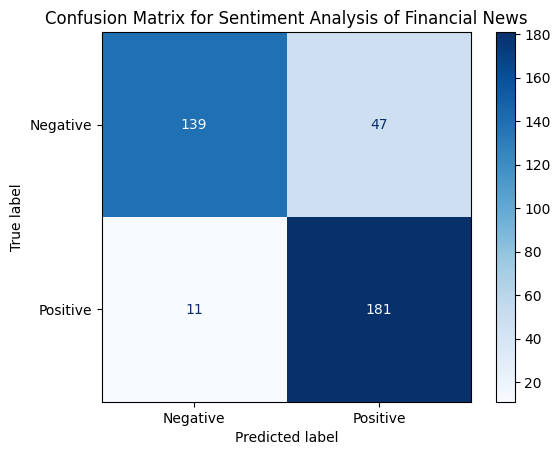

Accuracy: 0.8465608465608465
Precision: 0.793859649122807
Recall: 0.9427083333333334
F1 Score: 0.861904761904762
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.75      0.83       186
           1       0.79      0.94      0.86       192

    accuracy                           0.85       378
   macro avg       0.86      0.85      0.84       378
weighted avg       0.86      0.85      0.84       378



In [3]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Load the dataset
df = pd.read_csv('stock_senti_analysis.csv', encoding="ISO-8859-1")

# Data Splitting based on Date
train = df[df['Date'] < '20150101']
test = df[df['Date'] > '20141231']

# Preprocessing Training Data: Select only headline columns and clean
data = train.iloc[:, 2:27]
data.replace("[^a-zA-Z]", " ", regex=True, inplace=True)  # Remove punctuation and non-alphabetic characters

# Fill NaN values with empty strings to avoid errors
data.fillna('', inplace=True)

# Rename columns for easy reference
data.columns = [str(i) for i in range(25)]

# Convert all text to lowercase
for col in data.columns:
    data[col] = data[col].str.lower()

# Concatenate all 25 headline columns into a single string for each row
headlines = [' '.join(row) for row in data.values]







In [ ]:
# Feature Extraction with TF-IDF Vectorizer
tfidfvector = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)  # Using unigrams and bigrams, top 5000 features
traindataset = tfidfvector.fit_transform(headlines)

# Initialize and Train the Random Forest Classifier
randomclassifier = RandomForestClassifier(n_estimators=300, criterion='entropy', random_state=42)
randomclassifier.fit(traindataset, train['Label'])

# Preprocess Test Data similarly
test_data = test.iloc[:, 2:27]
test_data.replace("[^a-zA-Z]", " ", regex=True, inplace=True)
test_data.fillna('', inplace=True)  # Fill NaN values in test data

# Concatenate test headlines into single strings
test_headlines = [' '.join(row) for row in test_data.values]
testdataset = tfidfvector.transform(test_headlines)

# Predicting Sentiment on Test Data
predictions = randomclassifier.predict(testdataset)

In [ ]:
# Calculating Performance Metrics
accuracy = accuracy_score(test['Label'], predictions)
precision = precision_score(test['Label'], predictions)
recall = recall_score(test['Label'], predictions)
f1 = f1_score(test['Label'], predictions)
classification_rep = classification_report(test['Label'], predictions)

In [ ]:
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(test['Label'], predictions)
ConfusionMatrixDisplay(conf_matrix, display_labels=['Negative', 'Positive']).plot(cmap='Blues')
plt.title('Confusion Matrix for Sentiment Analysis of Financial News')
plt.show()

# Displaying calculated performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Classification Report:\n", classification_rep)